In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [4]:
#Read in data
df =pd.read_csv('stateexp.txt', sep=' ', skipinitialspace=True)

df.head()

,state,sat,takers,income,years,public,expend,rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   50 non-null     object 
 1   sat     50 non-null     int64  
 2   takers  50 non-null     int64  
 3   income  50 non-null     int64  
 4   years   50 non-null     float64
 5   public  50 non-null     float64
 6   expend  50 non-null     float64
 7   rank    50 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.2+ KB


In [7]:
df.describe()

,sat,takers,income,years,public,expend,rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,947.940000,26.220000,293.980000,16.209200,81.204000,22.965600,79.988000
std,70.856397,22.022521,43.693034,0.699982,9.830917,6.144932,6.523072
min,790.000000,2.000000,208.000000,14.390000,44.800000,13.840000,69.800000
25%,889.250000,6.250000,261.500000,15.910000,76.925000,19.592500,74.025000
50%,966.000000,16.000000,295.000000,16.360000,80.800000,21.610000,80.850000
75%,998.500000,47.750000,325.000000,16.757500,88.250000,26.387500,85.825000
max,1088.000000,69.000000,401.000000,17.410000,97.000000,50.100000,90.600000


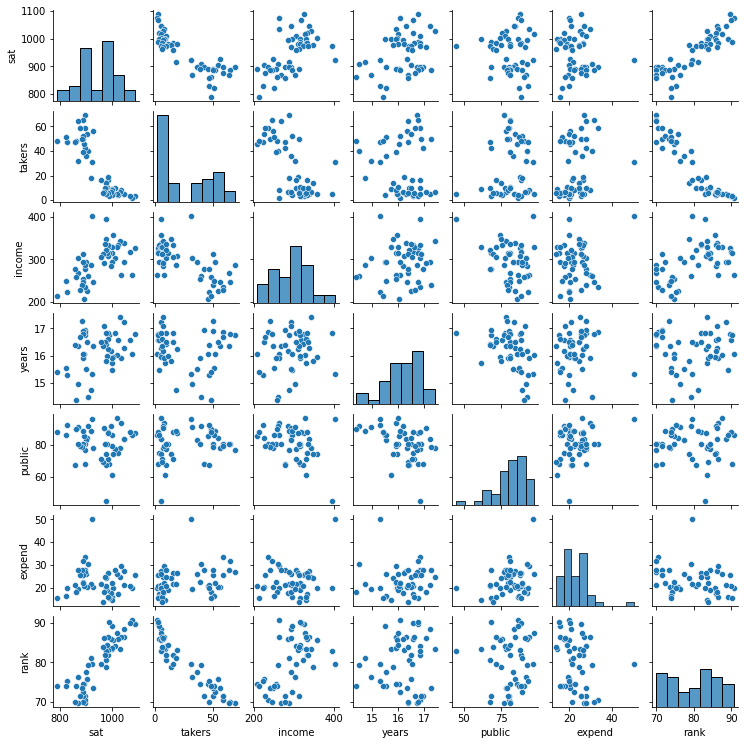

In [8]:
sns.pairplot(data=df, height=1.5)

(array([23.,  5.,  0.,  5.,  6.,  8.,  3.]),
 array([ 2.        , 11.57142857, 21.14285714, 30.71428571, 40.28571429,
        49.85714286, 59.42857143, 69.        ]),
 <BarContainer object of 7 artists>)

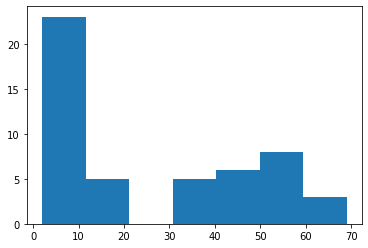

In [9]:
plt.hist(df['takers'], bins=7)

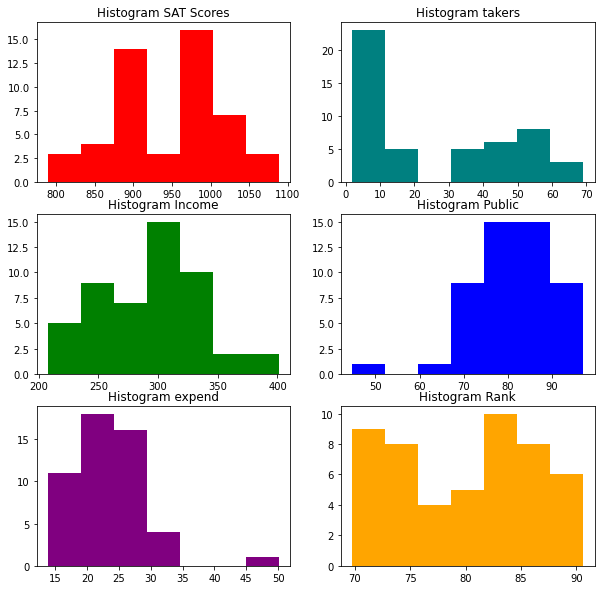

In [10]:
#histograms
fig, axes = plt.subplots(3, 2, figsize=(10,10))
 
axes[0,0].set_title("Histogram SAT Scores")
axes[0,0].hist(df['sat'], bins=7, color='red')
 
axes[0,1].set_title("Histogram takers")
axes[0,1].hist(df['takers'], bins=7,color='teal');
 
axes[1,0].set_title("Histogram Income")
axes[1,0].hist(df['income'], bins=7, color='green');
 
axes[1,1].set_title("Histogram Public")
axes[1,1].hist(df['public'], bins=7, color='blue');

axes[2,0].set_title("Histogram expend")
axes[2,0].hist(df['expend'], bins=7,color='purple');

axes[2,1].set_title("Histogram Rank")
axes[2,1].hist(df['rank'], bins=7, color='orange');

In [11]:
df.corr(method='pearson')

,sat,takers,income,years,public,expend,rank
sat,1.000000,-0.857810,0.584467,0.330969,-0.080357,-0.062878,0.879909
takers,-0.857810,1.000000,-0.661935,-0.101544,0.123556,0.283630,-0.942833
income,0.584467,-0.661935,1.000000,0.134762,-0.306567,0.131519,0.532700
years,0.330969,-0.101544,0.134762,1.000000,-0.417118,0.059829,0.070224
public,-0.080357,0.123556,-0.306567,-0.417118,1.000000,0.284591,0.050624
expend,-0.062878,0.283630,0.131519,0.059829,0.284591,1.000000,-0.264969
rank,0.879909,-0.942833,0.532700,0.070224,0.050624,-0.264969,1.000000


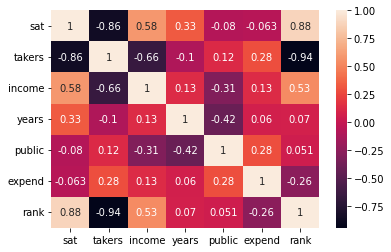

In [12]:
sns.heatmap(df.corr(method='pearson'), annot = True);
 
plt.show()

## Manipulate your data to fit analysis

In [13]:
y = df.iloc[:, 1].values.reshape(-1,1)

In [14]:
X1=sm.add_constant(df.iloc[:,2].values)
foo=pd.DataFrame(X1)
foo.head()

,0,1
0,1.0,3.0
1,1.0,2.0
2,1.0,3.0
3,1.0,5.0
4,1.0,5.0


In [15]:
X2=sm.add_constant(df.iloc[:, 2:].values)
foo=pd.DataFrame(X2)
foo.head()

,0,1,2,3,4,5,6
0,1.0,3.0,326.0,16.79,87.8,25.60,89.7
1,1.0,2.0,264.0,16.07,86.2,19.95,90.6
2,1.0,3.0,317.0,16.57,88.3,20.62,89.8
3,1.0,5.0,338.0,16.30,83.9,27.14,86.3
4,1.0,5.0,293.0,17.25,83.6,21.05,88.5


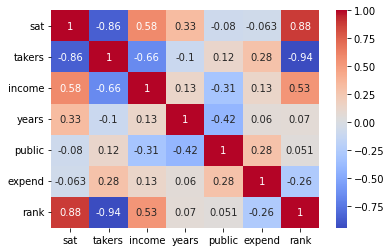

In [16]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# read in the data
sat_df = pd.read_csv('stateexp.txt', sep=' ', skipinitialspace=True)

df.head()

# examine correlation between variables
sns.heatmap(sat_df.corr(), annot=True, cmap='coolwarm')
plt.show()


## Building a Single Linear Regression Model of Income vs Expenditure

In [26]:
print(sat_df.head())
# Simple linear regression model of income vs expenditure
model_simple = smf.ols('expend ~ income', data=sat_df).fit()

# Print summary of model
print(model_simple.summary())


         state   sat  takers  income  years  public  expend  rank
0         Iowa  1088       3     326  16.79    87.8   25.60  89.7
1  SouthDakota  1075       2     264  16.07    86.2   19.95  90.6
2  NorthDakota  1068       3     317  16.57    88.3   20.62  89.8
3       Kansas  1045       5     338  16.30    83.9   27.14  86.3
4     Nebraska  1045       5     293  17.25    83.6   21.05  88.5
                            OLS Regression Results                            
Dep. Variable:                 expend   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8449
Date:                Wed, 05 Apr 2023   Prob (F-statistic):              0.363
Time:                        18:21:40   Log-Likelihood:                -160.79
No. Observations:                  50   AIC:                             325.6
Df Residuals:                      48   BIC:       

## The R-squared value of 0.017 indicates that only 1.7% of the variation in the dependent variable can be explained by the independent variable. The Adjusted R-squared value is negative, indicating that the independent variable does not contribute much to the model's explanatory power.

## The F-statistic of 0.8449 tests the overall significance of the model, and the associated probability (Prob(F-statistic)) is 0.363. As the probability is greater than 0.05, we can conclude that the model is not statistically significant.

## Building a Full OLS Model with All Features Included

In [27]:
import statsmodels.api as sm

# Create a matrix of independent variables
#X = sat_df[['income', 'years', 'public', 'takers']]
X = sat_df.drop(["expend", "state"], axis=1)
# Add an intercept term to the matrix
X = sm.add_constant(X)

# Create a vector of dependent variable
y = sat_df['expend']

# Fit the OLS model
full_model = sm.OLS(y, X).fit()

# Print the model summary
print(full_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 expend   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     8.681
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           3.32e-06
Time:                        18:24:19   Log-Likelihood:                -141.38
No. Observations:                  50   AIC:                             296.8
Df Residuals:                      43   BIC:                             310.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.1233     34.632     -1.476      0.1

### The R-squared value indicates that 54.8% of the variation in the dependent variable (expend) can be explained by the independent variables.

### In this model, only income and public have statistically significant coefficients at a 0.05 level of significance, while sat is significant at a 0.1 level. The coefficients for takers, years, and rank are not statistically significant.

### Overall, the model suggests that income and being a public institution have a positive effect on expenditure, while sat scores have a weak positive effect.

## Building a Reduced Model Containing the 3 Most Significant Variables

### Based on above p-value the significant variables are sat,income aand public

In [39]:
import statsmodels.api as sm
import pandas as pd

# Load the data into a pandas dataframe
data = pd.read_csv('stateexp.txt', sep=' ', skipinitialspace=True)

# Build the reduced model with the three most significant variables
reduced_model = sm.formula.ols('expend ~ income + sat+ public', data=data).fit()

# Print the summary of the reduced model
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 expend   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     3.393
Date:                Wed, 05 Apr 2023   Prob (F-statistic):             0.0256
Time:                        18:52:01   Log-Likelihood:                -156.23
No. Observations:                  50   AIC:                             320.5
Df Residuals:                      46   BIC:                             328.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6098     13.490      0.638      0.5

   df_resid          ssr  df_diff     ss_diff          F    Pr(>F)
0      46.0  1532.577652      0.0         NaN        NaN       NaN
1      43.0   836.701418      3.0  695.876235  11.920891  0.000008


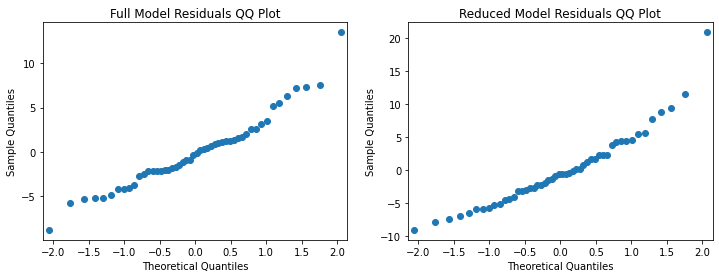

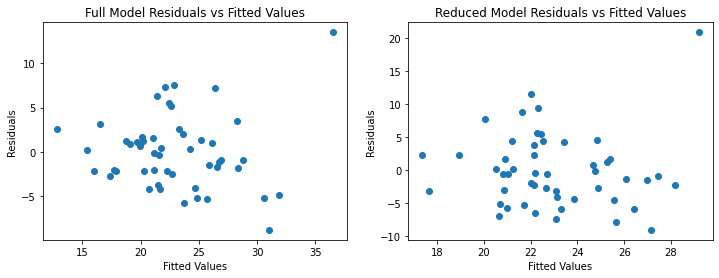

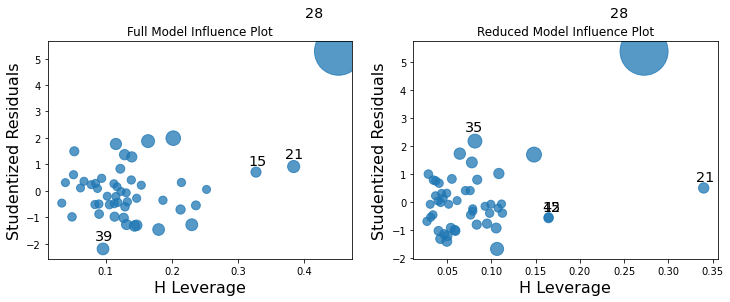

Full Model VIF Values:
[2.81261255e-05 2.50541223e-04 1.84579595e-05 6.01620899e-02
 3.62265865e-04 3.54853080e-03]
Reduced Model VIF Values:
[1.07524824e-05 8.13219962e-03 1.50088275e-04]


In [40]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('stateexp.txt', sep=' ', skipinitialspace=True)

# Fit the full model
X_full = sm.add_constant(df.drop(["expend", "state"], axis=1))
y = df['expend']
full_model = sm.OLS(y, X_full).fit()

# Fit the reduced model
X_reduced = sm.add_constant(df[['income', 'years', 'public']])
reduced_model = sm.OLS(y, X_reduced).fit()

# Calculate the residual of the full model
resid_full = full_model.resid

# Calculate the residual of the reduced model
resid_reduced = reduced_model.resid

# Calculate ANOVA
anova_results = sms.anova_lm(reduced_model, full_model)
print(anova_results)

# Check for normality of residuals
fig, axs = plt.subplots(1,2, figsize=(12,4))
sm.graphics.qqplot(resid_full, ax=axs[0])
axs[0].set_title('Full Model Residuals QQ Plot')
sm.graphics.qqplot(resid_reduced, ax=axs[1])
axs[1].set_title('Reduced Model Residuals QQ Plot')
plt.show()

# Check for homoscedasticity
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].scatter(full_model.fittedvalues, resid_full)
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Full Model Residuals vs Fitted Values')
axs[1].scatter(reduced_model.fittedvalues, resid_reduced)
axs[1].set_xlabel('Fitted Values')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Reduced Model Residuals vs Fitted Values')
plt.show()

# Check for influential points
fig, axs = plt.subplots(1,2, figsize=(12,4))
sm.graphics.influence_plot(full_model, ax=axs[0])
axs[0].set_title('Full Model Influence Plot')
sm.graphics.influence_plot(reduced_model, ax=axs[1])
axs[1].set_title('Reduced Model Influence Plot')
plt.show()

# Check for multicollinearity using VIF
X_full_vif = X_full.drop(columns=['const'])
vif_full = np.linalg.inv(X_full_vif.T.dot(X_full_vif)).diagonal()
print('Full Model VIF Values:')
print(vif_full)

X_reduced_vif = X_reduced.drop(columns=['const'])
vif_reduced = np.linalg.inv(X_reduced_vif.T.dot(X_reduced_vif)).diagonal()
print('Reduced Model VIF Values:')
print(vif_reduced)


## Based on the ANOVA table, a full model (with all predictor variables) and a reduced model (with fewer predictor variables). The reduced model has 3 fewer predictor variables, which results in a decrease in degrees of freedom and an increase in sum of squared residuals. The F-statistic of 11.92 indicates that the reduced model is significantly worse than the full model at the 0.05 significance level, and the p-value of 0.000008 confirms that this result is highly statistically significant.

# The ANOVA table provides statistical evidence that the full model with all predictor variables is significantly better than the reduced model with fewer predictor variables.